(1442, 224, 224)
2


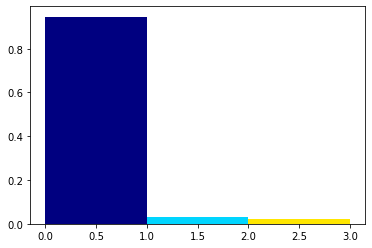

[ 0.35225516 10.31931463 15.5658703 ]
[0.94628374 0.03230189 0.02141437]
[0.33333333 0.33333333 0.33333333]


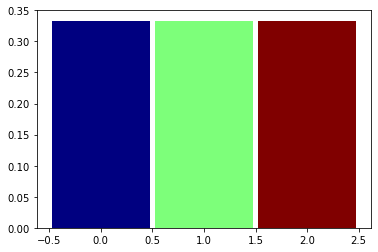

In [6]:
import os
import numpy as np
import albumentations as T
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils import class_weight
from mycolorpy import colorlist as mcp

def get_filenames(path, ext):
    X0 = []
    for i in sorted(os.listdir(path)):
        if i.endswith(ext):
            X0.append(os.path.join(path, i))
    return X0

def main():
    path = "dataset/224_2C/train_masks/"
    filenames = get_filenames(path, 'tiff')
    images = []
    for file in filenames:
        img = np.array(Image.open(file))

        images.append(img)

    print(np.array(images).shape)
    
    array = np.reshape(np.array(images), (np.array(images).shape[0]*np.array(images).shape[1]*np.array(images).shape[2]))
    print(np.max(array))
    hist, bin_edges, patches = plt.hist(array, bins=[0, 1, 2, 3], density=True, width=1)  # arguments are passed to np.histogram
    cm = plt.cm.jet
    for i, p in enumerate(patches):
        plt.setp(p, 'facecolor', cm(i/3)) # notice the i/25
    plt.show()
    class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1, 2], y=array)
    print(class_weights)
    print(hist)
    weight_classes = class_weights * hist
    print(weight_classes)
    color1=mcp.gen_color(cmap="jet",n=3)
    plt.figure()
    for i in range(weight_classes.shape[0]):
        plt.bar(i, weight_classes[i], color=color1[i], width=0.95)
    plt.show

if __name__ == '__main__':
    main()